# Computes and plots the urban wind as forecasted for today.
## kernel: polytope

# User selection:
## meteo type: ECMWF or on demand DT
## size and locations of the map: user can select the center and the size of the maps (EPSG: 31370)


In [9]:
#output_1 = cap.stdout.split('}\n')
#access_token = output_1[-1][0:-1]
#import earthkit.plots
from polytope.api import Client
import numpy as np
import pandas as pd
from src.urban_wind import get_wind_extreme_dt, read_cfd_wind, scale_cfd_wind, save_local_wind, get_wind_extreme_dt_ondemand
from src.green_pont import load_json_with_comments
from src.plots_jupyter import wind_animation
from IPython.display import HTML

import matplotlib.pyplot as plt

LIVE_REQUEST = True
cf=load_json_with_comments('etc/settings_wind_maps.json')
path_cfd=cf['path_cfd'] 
angles=cf["angles"]
height=cf["height"]

meteo_request="on_demand" # optios are: "on_demand" or "ECMWF"

# read pre-computed normalized CFD wind ratios
xc=153300 #center of antwerp
yc=211644 #center of antwerp
L=1500    # size of the map that will be created: if too large it insula crashes



# Request data from Extreme dt
LOCATION = ((51.213642, 4.415)) #  center of antwerp to get meteo data from ecmwf

In [4]:


crop_bounds = (xc-L, yc-L, xc+L, yc+L)
cfd_ratio=read_cfd_wind(path_cfd,angles, height,crop_bounds)

Reading CFD wind files from  DATA_AntwerpWindStudy/wind_ratios


In [2]:


if meteo_request=="on_demand" 
    wind_meteo=get_wind_extreme_dt(LOCATION,date='-1')
elif if meteo_request=="ECMWF" 
    wind_meteo=get_wind_extreme_dt_ondemand(LOCATION,date="2023-08-20")
else:
    print('Unknown meteo request')

print(wind_meteo)

2025-11-06 14:16:36 - INFO - Key read from /home/jovyan/.polytopeapirc
2025-11-06 14:16:36 - INFO - Sending request...
{'request': 'class: d1\n'
            'dataset: on-demand-extremes-dt\n'
            "date: '2023-08-20'\n"
            'expect: 0\n'
            'expver: aab0\n'
            'georef: u09tvk\n'
            'levelist: 80/to/90\n'
            'levtype: ml\n'
            'param:\n'
            "- '129'\n"
            "- '130'\n"
            "- '131'\n"
            "- '132'\n"
            "- '133'\n"
            "- '260238'\n"
            'step:\n'
            '- 1\n'
            '- 2\n'
            '- 3\n'
            '- 4\n'
            '- 5\n'
            '- 6\n'
            '- 7\n'
            '- 8\n'
            '- 9\n'
            '- 10\n'
            '- 11\n'
            '- 12\n'
            '- 13\n'
            '- 14\n'
            '- 15\n'
            '- 16\n'
            '- 17\n'
            '- 18\n'
            '- 19\n'
            '- 20\n'
            '- 21\n'


                     wind_speed    wind_dir
2023-08-20 00:00:00    1.266153  262.487765
2023-08-20 01:00:00    0.843530  234.205875
2023-08-20 02:00:00    1.484247  208.428270


In [5]:
# scale meso-scale wind to local urban scale using CFD ratios
wind_local=scale_cfd_wind(wind_meteo, cfd_ratio)
print('Done processing local wind')


Scaling meso-scale wind to local urban scale using CFD ratios
Done processing local wind


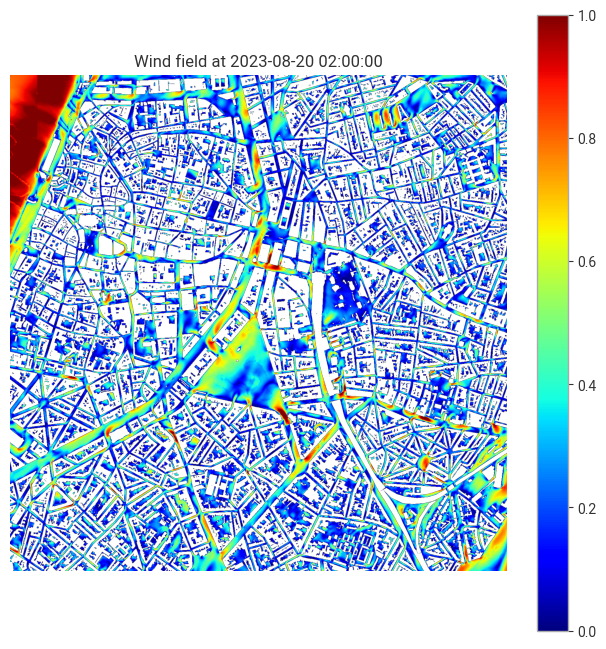

In [8]:


from matplotlib import animation
from IPython.display import HTML

times = sorted(wind_local.keys())

fig, ax = plt.subplots(figsize=(8,8))
all_values = np.concatenate([wind_local[t].ravel() for t in times])
vmin, vmax = np.percentile(all_values, [2, 98])  # robust color scale

im = ax.imshow(wind_local[times[0]], cmap='jet', animated=True, vmin=0, vmax=1)
cbar = fig.colorbar(im, ax=ax)
title = ax.set_title(f"Wind velocity [m/s] at {times[0]}")
ax.axis("off")

# Update function for animation
def update(frame):
    data = wind_local[times[frame]]
    im.set_array(data)
    title.set_text(f"Wind field at {times[frame]}")
    return [im, title]

# Build the animation
ani = animation.FuncAnimation(
    fig, update, frames=len(times), interval=800, blit=True
)

# Show in Jupyter
HTML(ani.to_jshtml())



In [ ]:
plt.close()